In [1]:
from imports import *

# Создание признаков из трилпетов

In [ ]:
import pandas as pd
from features_utils import optimized_triplet_features

# Конфигурация: (входной CSV, имя id-колонки, выходной CSV)
configs = [
    ('output_files/jokes_relations_clean.csv', 'joke_id',    'features/jokes_features.csv'),
    ('output_files/lit_relations_lit_clean.csv',  'segment_id','features/lit_features.csv'),
]

for in_path, id_col, out_path in configs:
    # Читаем и очищаем данные
    df = pd.read_csv(in_path)
    df = df.dropna(subset=['subj', 'pred', 'obj'])
    
    # Расчёт признаков и сохранение
    features = optimized_triplet_features(df, id_col)
    features.to_csv(out_path, index=False)

In [ ]:
import pandas as pd
from features_utils import triplet_extra_features

# (входной CSV, путь к «сырым» данным, имя id-колонки, выходной CSV)
configs = [
    ('features/jokes_features.csv', 'output_files/jokes_relations_clean.csv', 'joke_id', 'features/jokes_triplet_features_full.csv'),
    ('features/lit_features.csv', 'output_files/lit_relations_lit_clean.csv', 'segment_id', 'features/lit_triplet_features_full.csv'),
]

for base_path, raw_path, id_col, out_path in configs:
    base = pd.read_csv(base_path)
    raw  = pd.read_csv(raw_path)
    
    # вычисляем расширенные признаки
    extra = triplet_extra_features(raw, id_col)
    
    # объединяем и сохраняем
    pd.merge(base, extra, on=id_col, how='left').to_csv(out_path, index=False)


In [ ]:
import pandas as pd

jokes_path = 'features/jokes_triplet_features_full.csv'
lit_path   = 'features/lit_triplet_features_full.csv'

jokes_df = pd.read_csv(jokes_path)
lit_df   = pd.read_csv(lit_path)

means_jokes = jokes_df.mean(numeric_only=True)
means_lit   = lit_df.mean(numeric_only=True)

avg_df = pd.DataFrame({
    'jokes': means_jokes,
    'lit':   means_lit
})

# Выводим в нужном формате
print(avg_df.to_string())


                      jokes       lit
avg_subj_len       6.469054  6.571102
avg_pred_len       5.905220  6.440032
avg_obj_len        6.237621  6.194611
unique_subj_count  1.702787  2.449644
unique_pred_count  1.952745  2.847221
unique_obj_count   2.293619  3.415305
triplet_count      3.091738  5.313455
subj_obj_ratio     0.832567  0.814479
pred_edge_ratio    0.741467  0.711175
pred_entropy       0.907110  1.211311
subj_entropy       0.788257  1.106130
obj_entropy        1.162785  1.523421


# Графовые признаки

In [ ]:
import pandas as pd
from features_utils import process_graph_folder

if __name__ == "__main__":
    # Пути к папкам с графами
    jokes_path = 'collected_graphs/joke_graphs'
    lit_path   = 'collected_graphs/lit_graphs'

    # Запуск обработки без выборки
    joke_feats = process_graph_folder(jokes_path, 'joke')
    lit_feats  = process_graph_folder(lit_path,   'lit')

    # Сохранение в CSV
    joke_feats.to_csv('features/jokes_graph_features.csv', index=False)
    lit_feats.to_csv('features/lit_graph_features.csv',   index=False)


In [ ]:
import pandas as pd
from features_utils import compute_extended_features

if __name__ == "__main__":
    # Пути
    jokes_graphs = 'collected_graphs/joke_graphs'
    lit_graphs   = 'collected_graphs/lit_graphs'

    # Вычисляем расширенные признаки
    joke_ext = compute_extended_features(jokes_graphs, 'joke_id')
    lit_ext  = compute_extended_features(lit_graphs,   'lit_id')

    # Читаем базовые признаки
    joke_base = pd.read_csv('features/jokes_graph_features.csv')
    lit_base  = pd.read_csv('features/lit_graph_features.csv')

    # Объединяем
    joke_merged = pd.merge(joke_base, joke_ext, on='joke_id', how='left')
    lit_merged  = pd.merge(lit_base,  lit_ext,   on='lit_id',   how='left')

    # Сохраняем
    joke_merged.to_csv('features/jokes_graph_features.csv', index=False)
    lit_merged.to_csv('features/lit_graph_features.csv',   index=False)

    print("Расширенные признаки успешно добавлены.")


In [ ]:
# import pandas as pd

# # 1) Jokes: переносим столбец 'joke_id' в начало
# joke_df = pd.read_csv('features/jokes_graph_features.csv')
# joke_cols = ['joke_id'] + [c for c in joke_df.columns if c != 'joke_id']
# joke_df = joke_df[joke_cols]
# joke_df.to_csv('jokes_graph_features.csv', index=False)


# # 2) Literature: переносим столбец 'lit_id' в начало
# lit_df = pd.read_csv('features/lit_graph_features.csv')
# lit_cols = ['lit_id'] + [c for c in lit_df.columns if c != 'lit_id']
# lit_df = lit_df[lit_cols]
# lit_df.to_csv('lit_graph_features.csv', index=False)


In [ ]:
# from features_utils import append_graph_extra

# append_graph_extra(
#     'features/jokes_graph_features.csv',
#     'collected_graphs/joke_graphs',
#     'joke_id'
# )

# append_graph_extra(
#     'features/lit_graph_features.csv',
#     'collected_graphs/lit_graphs',
#     'lit_id'
# )

In [9]:
import pandas as pd

jokes_df = pd.read_csv('features/jokes_graph_features.csv')
lit_df   = pd.read_csv('features/lit_graph_features.csv')

jokes_means = jokes_df.mean(numeric_only=True).rename('jokes')
lit_means   = lit_df.mean(numeric_only=True).rename('literature')

means_df = pd.concat([jokes_means, lit_means], axis=1)

print(means_df)


                               jokes  literature
num_nodes                   4.376966    6.482423
num_edges                   2.995979    5.372003
avg_degree                  1.263483    1.317796
density                     0.312001    0.252831
num_components              1.500477    1.890585
avg_component_size          2.917623    3.085726
avg_shortest_path           1.254396    1.267872
diameter                    1.697306    1.722138
avg_clustering              0.040126    0.064763
transitivity                0.048097    0.087724
num_triangles               0.094601    0.463569
avg_degree_centrality       0.624014    0.505670
max_degree_centrality       0.767729    0.653887
avg_closeness_centrality    0.320291    0.260147
max_closeness_centrality    0.602572    0.495509
avg_betweenness_centrality  0.016159    0.011272
max_betweenness_centrality  0.052575    0.040068
leaf_node_count             3.168171    4.232926
assortativity              -0.200709   -0.140366
max_k_core          

In [1]:
import pandas as pd

jokes_df = pd.read_csv('features/jokes_graph_features_trimmed.csv')
lit_df   = pd.read_csv('features/lit_graph_features_trimmed.csv')

jokes_means = jokes_df.mean(numeric_only=True).rename('jokes')
lit_means   = lit_df.mean(numeric_only=True).rename('literature')

means_df = pd.concat([jokes_means, lit_means], axis=1)

print(means_df)


                               jokes  literature
num_nodes                   4.109009    5.358137
num_edges                   2.772535    3.780466
avg_degree                  1.259225    1.308700
density                     0.315166    0.256503
num_components              1.439577    1.787909
avg_component_size          2.893859    3.027723
avg_shortest_path           0.861297    0.622733
diameter                    1.164668    0.843724
avg_clustering              0.039665    0.062862
transitivity                0.047399    0.085807
num_triangles               0.082783    0.180092
avg_degree_centrality       0.630345    0.513014
max_degree_centrality       0.774000    0.661132
avg_closeness_centrality    0.323470    0.263769
max_closeness_centrality    0.608210    0.501984
avg_betweenness_centrality  0.016317    0.011416
max_betweenness_centrality  0.052990    0.040366
leaf_node_count             3.001699    3.720013
max_k_core                  1.081390    1.163522
spectral_radius     

**Графовые признаки на основе триплетов «субъект–предикат–объект»**

Мы вычислили ряд графовых признаков на основе триплетов «субъект–предикат–объект», полученных из текстов. Эти метрики характеризуют структуру графа для каждого текста (шутки или литературного фрагмента). К основным рассчитанным графовым признакам относятся:

- `num_nodes` – число узлов в графе (количество уникальных сущностей/объектов в тексте).
- `num_edges` – число рёбер (количество триплетов/отношений в тексте). По сути, это количество предикатных связей, выделенных в тексте.
- `avg_degree` – средняя степень узла в графе (среднее количество связей на сущность). Отражает, насколько насыщенными связями являются сущности.
- `density` – плотность графа (нормализованное количество связей относительно максимального возможного для данного числа узлов). Плотность показывает, какая доля всех возможных связей реализована.
- `num_components` – число компонент связности (сколькими несвязанными частями распадается граф). Для ориентированных графов используются слабосвязные компоненты.
- `avg_component_size` – средний размер компонент (среднее число узлов на компоненту). Вместе с числом компонент даёт представление о фрагментации графа.
- `avg_shortest_path` – средняя длина кратчайшего пути между узлами (в неориентированном варианте графа, обычно рассчитывается для крупнейшей компоненты). Отражает среднюю «дистанцию» между сущностями.
- `diameter` – диаметр графа (максимальная длина кратчайшего пути между узлами в неориентированном графе). Показывает наибольшее расстояние между сущностями.
- `avg_clustering` – средний коэффициент кластеризации (средняя доля замкнутых треугольников вокруг каждого узла). Характеризует склонность к образованию замкнутых триад.
- `transitivity` – глобальный коэффициент транзитивности (отношение числа треугольников к числу тройек вершин). Отражает замкнутость структуры связей всего графа.
- `num_triangles` – число треугольников в графе (количество уникальных троек узлов, попарно связанных друг с другом).
- `avg_deg_cent`, `max_deg_cent` – усреднённая и максимальная центральность по степени (Degree Centrality). Отражают распределение связей и «центральность» самых связанных узлов.
- `avg_clos_cent`, `max_clos_cent` – усреднённая и максимальная центральность по близости (Closeness Centrality). Характеризуют компактность графа и наличие «близких ко всем» узлов.
- `spectral_radius` – спектральный радиус графа (наибольшее по модулю собственное значение матрицы смежности). Связан с общей связностью структуры: более высокое значение у крупных и плотных графов.


In [ ]:
# import pandas as pd

# # 1) Читаем
# jokes = pd.read_csv('features/jokes_graph_features.csv')
# lit   = pd.read_csv('features/lit_graph_features.csv')

# # 2) Считаем количество NaN в каждом столбце
# print("=== Пропуски в шутках ===")
# print(jokes.isna().sum().sort_values(ascending=False).head(10))

# print("\n=== Пропуски в литературе ===")
# print(lit.isna().sum().sort_values(ascending=False).head(10))


=== Пропуски в шутках ===
assortativity                 288358
graph_radius                  104659
avg_shortest_path             104659
diameter                      104659
max_k_core                      1067
max_degree_centrality              0
spectral_radius                    0
leaf_node_count                    0
max_betweenness_centrality         0
avg_betweenness_centrality         0
dtype: int64

=== Пропуски в литературе ===
assortativity                 200318
graph_radius                  130697
avg_shortest_path             130697
diameter                      130697
max_k_core                      1632
max_degree_centrality              0
spectral_radius                    0
leaf_node_count                    0
max_betweenness_centrality         0
avg_betweenness_centrality         0
dtype: int64


In [ ]:
# import pandas as pd

# # Список файлов и соответствующих им идентификаторов
# files = [
#     ('features/jokes_graph_features.csv', 'joke_id'),
#     ('features/lit_graph_features.csv',   'lit_id'),
# ]

# for path, id_col in files:
#     # 1) Читаем датафрейм
#     df = pd.read_csv(path)

#     # 2) Убираем колонку assortativity, если она есть
#     if 'assortativity' in df.columns:
#         df = df.drop(columns='assortativity')

#     # 3) Заменяем NaN на 0 для метрик, не считающихся в несвязных графах
#     df[['graph_radius','avg_shortest_path','diameter']] = \
#         df[['graph_radius','avg_shortest_path','diameter']].fillna(0)

#     # 4) Заполняем пропуски в max_k_core медианой
#     df['max_k_core'] = df['max_k_core'].fillna(df['max_k_core'].median())

#     # 5) Сохраняем очищенный датафрейм
#     df.to_csv(path, index=False)


In [ ]:
import pandas as pd

jokes = pd.read_csv('features/jokes_graph_features.csv')
lit   = pd.read_csv('features/lit_graph_features.csv')

# Выбираем метрики с тяжёлыми хвостами
skew_cols = ['num_nodes', 'num_edges', 'leaf_node_count', 'num_triangles']

# Считаем порог 99-го перцентиля для каждой метрики на объединённом датасете
all_df = pd.concat([jokes, lit], ignore_index=True)
percentiles = all_df[skew_cols].quantile(0.99)

print("Пороги 99-го перцентиля:")
print(percentiles)

# оставляем те строки, в которых все четыре метрики ≤ своему порогу
mask_j = (jokes[skew_cols] <= percentiles).all(axis=1)
mask_l = (lit[skew_cols]   <= percentiles).all(axis=1)

jokes_trimmed = jokes[mask_j].reset_index(drop=True)
lit_trimmed   = lit[mask_l].reset_index(drop=True)

print(f"\nДо отсечения: Jokes={len(jokes)} строк, Lit={len(lit)} строк")
print(f"После отсечения: Jokes={len(jokes_trimmed)}, Lit={len(lit_trimmed)}")

# Сохраняем результаты
jokes_trimmed.to_csv('features/jokes_graph_features_trimmed.csv', index=False)
lit_trimmed.to_csv(  'features/lit_graph_features_trimmed.csv',   index=False)


Пороги 99-го перцентиля:
num_nodes          20.0
num_edges          16.0
leaf_node_count    13.0
num_triangles       2.0
Name: 0.99, dtype: float64

До отсечения: Jokes=326804 строк, Lit=253686 строк
После отсечения: Jokes=323038, Lit=249251


### U-критерий Манна–Уитни и Двухвыборочный тест Колмогорова–Смирнова

* **Тест Манна–Уитни (U-тест)**  
  Сравнивает две независимые выборки (например, шутки и литературу) по «расположению» значений признака, не предполагая нормального распределения.

* **Нулевая гипотеза (H₀):**  
  Распределения в двух группах одинаковы (медианы равны).

* **Альтернативная гипотеза (H₁):**  
  Распределения различаются (медианы смещены).

* **Параметры теста**

  * **U-статистика (U)**  
    Число «попарных сравнений», в которых наблюдения из первой выборки превосходят наблюдения из второй.  
    * В лучшем (максимальном) случае: U = n₁·n₂  
    * В худшем (минимальном) случае: U = 0  
    * При полном совпадении распределений: U ≈ (n₁·n₂) / 2

  * **p-value**  
    Вероятность получить такое U (или более экстремальное) при справедливости H₀.  
    * p < 0.05 обычно считается **статистически значимым**  
    * p = 0.00e+00 означает p ≪ 1×10⁻³⁰⁰ – колоссально значимое различие, H₀ **отвергается**


In [2]:
import pandas as pd
from scipy.stats import mannwhitneyu, ks_2samp

# 1) Загружаем очищенные датасеты
jokes = pd.read_csv('features/jokes_graph_features_trimmed.csv')
lit   = pd.read_csv('features/lit_graph_features_trimmed.csv')

# 2) Определяем общий список признаков (исключаем идентификаторы)
j_feats = set(jokes.columns) - {'joke_id'}
l_feats = set(lit.columns)   - {'lit_id'}
features = sorted(j_feats & l_feats)

# 3) Функция для MW-U
def compute_mwu(jokes, lit, feats):
    rows = []
    for feat in feats:
        x = jokes[feat].dropna()
        y = lit[feat].dropna()
        stat, p = mannwhitneyu(x, y, alternative='two-sided')
        rows.append((feat, stat, p))
    df = pd.DataFrame(rows, columns=['feature','U_stat','p_value'])
    df['p_value_sci'] = df['p_value'].apply(lambda p: f"{p:.2e}")
    return df.sort_values('p_value')

# 4) Функция для KS-test
def compute_ks(jokes, lit, feats):
    rows = []
    for feat in feats:
        x = jokes[feat].dropna()
        y = lit[feat].dropna()
        stat, p = ks_2samp(x, y, alternative='two-sided')
        rows.append((feat, stat, p))
    df = pd.DataFrame(rows, columns=['feature','KS_stat','p_value'])
    df['p_value_sci'] = df['p_value'].apply(lambda p: f"{p:.2e}")
    return df.sort_values('p_value')

# 5) Запуск и вывод
mwu_df = compute_mwu(jokes, lit, features)
ks_df  = compute_ks (jokes, lit, features)

print("=== Mann–Whitney U ===")
print(mwu_df[['feature','U_stat','p_value_sci']].to_string(index=False))

print("\n=== Kolmogorov–Smirnov ===")
print(ks_df [['feature','KS_stat','p_value_sci']].to_string(index=False))


=== Mann–Whitney U ===
                   feature       U_stat p_value_sci
           leaf_node_count 3.224600e+10    0.00e+00
             num_triangles 3.688117e+10    0.00e+00
                 num_nodes 3.152794e+10    0.00e+00
                 num_edges 3.221353e+10    0.00e+00
            num_components 3.177724e+10    0.00e+00
                max_k_core 3.695223e+10    0.00e+00
     max_degree_centrality 4.814073e+10    0.00e+00
  max_closeness_centrality 4.846682e+10    0.00e+00
              graph_radius 4.802656e+10    0.00e+00
              transitivity 3.698519e+10    0.00e+00
                   density 4.901341e+10    0.00e+00
         avg_shortest_path 4.810094e+10    0.00e+00
     avg_degree_centrality 4.900392e+10    0.00e+00
                avg_degree 3.626721e+10    0.00e+00
        avg_component_size 3.723468e+10    0.00e+00
            avg_clustering 3.703279e+10    0.00e+00
  avg_closeness_centrality 4.905536e+10    0.00e+00
                  diameter 4.815117e+10  

In [5]:
import pandas as pd
from scipy.stats import mannwhitneyu, ks_2samp
from statsmodels.stats.multitest import multipletests

# 1) Загружаем «обрезанные» датасеты
jokes = pd.read_csv('features/jokes_graph_features_trimmed.csv')
lit   = pd.read_csv('features/lit_graph_features_trimmed.csv')

# 2) Общий список признаков (без ID)
j_feats = set(jokes.columns) - {'joke_id'}
l_feats = set(lit.columns)   - {'lit_id'}
features = sorted(j_feats & l_feats)

# 3) Собираем p-values для обоих тестов
mwu_p, ks_p = [], []
for feat in features:
    x = jokes[feat].dropna()
    y = lit[feat].dropna()
    _, p1 = mannwhitneyu(x, y, alternative='two-sided')
    _, p2 = ks_2samp(x, y, alternative='two-sided')
    mwu_p.append(p1)
    ks_p.append(p2)

# 4) Применяем поправку Холма–Бонферрони (alpha=0.05)
rej_mwu, p_mwu_corr, _, _ = multipletests(mwu_p, alpha=0.05, method='holm')
rej_ks,  p_ks_corr,  _, _ = multipletests(ks_p,  alpha=0.05, method='holm')

# 5) Собираем результаты в таблицу
results = pd.DataFrame({
    'feature':     features,
    'p_mwu_raw':   mwu_p,
    'p_mwu_holm':  p_mwu_corr,
    'sig_mwu':     rej_mwu,
    'p_ks_raw':    ks_p,
    'p_ks_holm':   p_ks_corr,
    'sig_ks':      rej_ks,
})

# 6) Форматированный вывод
pd.set_option('display.float_format', '{:.2e}'.format)
print(results.sort_values('p_mwu_holm').to_string(index=False))


                   feature  p_mwu_raw  p_mwu_holm  sig_mwu  p_ks_raw  p_ks_holm  sig_ks
           leaf_node_count   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
             num_triangles   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
                 num_nodes   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
                 num_edges   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
            num_components   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
                max_k_core   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
     max_degree_centrality   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
  max_closeness_centrality   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
              graph_radius   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
              transitivity   0.00e+00    0.00e+00     True  0.00e+00   0.00e+00    True
                   density   0.0

***Результаты непараметрических тестов***

После очистки данных и обрезки хвостов (99-й перцентиль) были пересчитаны U-тест Манна–Уитни и KS-тест для всех признаков. 

---

**1. Mann–Whitney U-тест**

- **Все признаки**, кроме нескольких, дают p ≪ 0.05, то есть медианы распределений шуток и литературы достоверно различаются.  
- **Топ-5 по U-statistic** (наибольшее расхождение рангов):
  1. `avg_closeness_centrality`  
  2. `density`  
  3. `avg_degree_centrality`  
  4. `max_closeness_centrality`  
  5. `graph_radius`  

- **Наименее выраженный, но значимый эффект**:
  - `avg_betweenness_centrality` (p≈3.7 × 10⁻¹⁹⁸)  
  - `max_betweenness_centrality` (p≈9.96 × 10⁻¹⁹²)  
  - `spectral_radius` (p≈1.24 × 10⁻¹⁴⁷)  

---

**2. Kolmogorov–Smirnov тест**

- **Все признаки**, кроме `spectral_radius`, имеют p ≪ 0.05 → распределения значимо различаются.  
- **Топ-5 по KS-statistic**:
  1. `num_components` (≈0.195)  
  2. `avg_shortest_path` (≈0.195)  
  3. `graph_radius` (≈0.195)  
  4. `avg_closeness_centrality` (≈0.193)  
  5. `avg_degree_centrality` (≈0.188)  

- **Самый слабый эффект**:
  - `spectral_radius` (KS≈0.0095, p≈1.55 × 10⁻¹¹)

---

**Выводы**

1. **Практически все признаки** структурных и кластеризационных метрик статистически различаются между жанрами даже после удаления экстремальных значений.  
2. **Сильнее всего различаются**:
   - **Метрики центральности** (`avg_closeness_centrality`, `avg_degree_centrality`, `max_closeness_centrality`)  
   - **Характеристики состава связности** (`num_components`, `graph_radius`, `avg_shortest_path`, `density`)  
3. **Наименее выражены**:  
   - Метрики **betweenness** и **spectral_radius**.  


4. **Практическая рекомендация**: при дальнейшем анализе, визуализациях и построении классификатора сфокусироваться на показателях центральности и связности — они дают наибольший вклад в разделение шуток и литературных текстов.

### Cliff's Delta

In [27]:
import pandas as pd
import numpy as np

def cliffs_delta_fast(x, y):
    """
    Возвращает (delta, size) быстрее за счёт сортировки:
      delta = (число пар x_i > y_j) - (число пар x_i < y_j) 
              делённое на (n * m)
    """
    x = np.asarray(x)
    y = np.asarray(y)
    n, m = len(x), len(y)
    if n == 0 or m == 0:
        return np.nan, 'negligible'

    # сортируем y один раз
    y_sorted = np.sort(y)

    # для каждого x_i считаем, сколько y_j < x_i и сколько y_j > x_i
    # searchsorted даёт индекс первой позиции, куда можно вставить x_i,
    # т.е. count_less = pos, а count_greater = m - pos_right
    pos_left  = np.searchsorted(y_sorted, x, side='left')
    pos_right = np.searchsorted(y_sorted, x, side='right')
    # суммируем по всем x_i
    total_less    = pos_left.sum()
    total_greater = (m - pos_right).sum()

    delta = (total_greater - total_less) / (n * m)
    ad = abs(delta)

    # классификация эффекта
    if ad < 0.147:
        size = 'negligible'
    elif ad < 0.33:
        size = 'small'
    elif ad < 0.474:
        size = 'medium'
    else:
        size = 'large'
    return delta, size

# -----------------------------------------------------------------------------
# Основной блок: загружаем данные и считаем Cliff's Delta по всем признакам
# -----------------------------------------------------------------------------

# 1) Загрузка
jokes = pd.read_csv('features/jokes_graph_features_trimmed.csv')
lit   = pd.read_csv('features/lit_graph_features_trimmed.csv')

# 2) Список признаков (без идентификаторов)
j_feats = set(jokes.columns) - {'joke_id'}
l_feats = set(lit.columns)   - {'lit_id'}
features = sorted(j_feats & l_feats)

# 3) Расчёт
rows = []
for feat in features:
    x = jokes[feat].dropna().values
    y = lit[feat].dropna().values
    delta, size = cliffs_delta_fast(x, y)
    rows.append({
        'feature': feat,
        'cliffs_delta': delta,
        'effect_size': size,
        'joke_median': np.median(x),
        'lit_median':  np.median(y)
    })

# 4) Сбор результатов
res = pd.DataFrame(rows)
# Для сортировки по «силе эффекта»
order = {'large':3,'medium':2,'small':1,'negligible':0}
res = res.sort_values('cliffs_delta', key=lambda s: s.abs(), ascending=False)
print(res.to_string(index=False))


                   feature  cliffs_delta effect_size  joke_median  lit_median
  avg_closeness_centrality     -0.218501       small     0.333333    0.166667
                   density     -0.217459       small     0.333333    0.166667
     avg_degree_centrality     -0.217223       small     0.666667    0.333333
                 num_nodes      0.216868       small     3.000000    4.000000
            num_components      0.210675       small     1.000000    2.000000
  max_closeness_centrality     -0.203882       small     0.500000    0.333333
                 num_edges      0.199838       small     2.000000    3.000000
           leaf_node_count      0.199032       small     2.000000    3.000000
                  diameter     -0.196042       small     1.000000    0.000000
     max_degree_centrality     -0.195782       small     1.000000    0.600000
         avg_shortest_path     -0.194794       small     1.000000    0.000000
              graph_radius     -0.192946       small     1.00000

По результатам расчёта Cliff’s Delta получили две группы признаков:

## «Small» эффект (|δ| ≥ 0.147)  
Ключевые характеристики жанров:

- `avg_closeness_centrality` (δ ≈ –0.22)  
- `density`                   (δ ≈ –0.22)  
- `avg_degree_centrality`     (δ ≈ –0.22)  
- `num_nodes`                 (δ ≈  0.22)  
- `num_components`            (δ ≈  0.21)  
- `max_closeness_centrality`  (δ ≈ –0.20)  
- `num_edges`                 (δ ≈  0.20)  
- `leaf_node_count`           (δ ≈  0.20)  
- `diameter`                  (δ ≈ –0.20)  
- `avg_shortest_path`         (δ ≈ –0.19)  
- `graph_radius`              (δ ≈ –0.19)  

---

## «Negligible» эффект (|δ| < 0.147)  
Остальные признаки.


In [6]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# 1) Загружаем очищенные данные
jokes = pd.read_csv('features/jokes_graph_features_trimmed.csv')
lit   = pd.read_csv('features/lit_graph_features_trimmed.csv')

# 2) Добавляем метку группы
jokes['group'] = 'joke'
lit  ['group'] = 'lit'
df = pd.concat([jokes, lit], ignore_index=True)

# 3) Перечень признаков
features = [
    'avg_closeness_centrality','density','avg_degree_centrality',
    'num_components','max_closeness_centrality',
    'leaf_node_count','diameter','avg_shortest_path','graph_radius'
]

# 4) Формула MANOVA
formula = ' + '.join(features) + ' ~ group'

# 5) Запуск MANOVA
maov = MANOVA.from_formula(formula, data=df)
print(maov.mv_test())


                      Multivariate linear model
                                                                      
----------------------------------------------------------------------
       Intercept         Value  Num DF    Den DF     F Value    Pr > F
----------------------------------------------------------------------
          Wilks' lambda  0.0321 9.0000 572279.0000 1918714.0386 0.0000
         Pillai's trace  0.9679 9.0000 572279.0000 1918714.0386 0.0000
 Hotelling-Lawley trace 30.1748 9.0000 572279.0000 1918714.0386 0.0000
    Roy's greatest root 30.1748 9.0000 572279.0000 1918714.0386 0.0000
----------------------------------------------------------------------
                                                                      
----------------------------------------------------------------------
             group          Value  Num DF    Den DF    F Value  Pr > F
----------------------------------------------------------------------
              Wilks' lambda 0

В блоке group у всех четырёх тест-статистик (Wilks’ λ, Pillai’s trace, Hotelling–Lawley, Roy’s root) получилось одно и то же значение F и одно и то же p:

В нашей модели зависимыми переменными являются девять признаков, а единственным предиктором — фактор “group” с двумя уровнями.

Все четыре мультивариантных теста сводятся к одному и тому же сравнению «два вектора средних», и все четыре показателя (Wilks’ λ, Pillai’s trace, Lawley–Hotelling, Roy’s root) оказываются разными преобразованиями одной и той же основной величины. Поэтому они приводят к одной и той же числовой F-статистике и, соответственно, к одинаковому p-value.

Итог: при двух группах и одном факторе все мультивариантные критерии совпадают по F и p, потому что в этом упрощённом случае они математически эквивалентны.

# Визуализация

In [30]:
import pandas as pd

# Читаем очищенные фреймы
jokes = pd.read_csv('features/jokes_graph_features_trimmed.csv')
lit   = pd.read_csv('features/lit_graph_features_trimmed.csv')

# Убираем колонки
drop_cols = ['num_nodes', 'num_edges']
jokes = jokes.drop(columns=drop_cols)
lit   = lit.drop(columns=drop_cols)

# Сохраняем
jokes.to_csv('features/jokes_graph_features_f.csv', index=False)
lit  .to_csv('features/lit_graph_features_f.csv',   index=False)


Избавляемся от num_nodes и num_edges, так как у них разница показана в основном в силу объема литературных текстов в сравнении с шутками

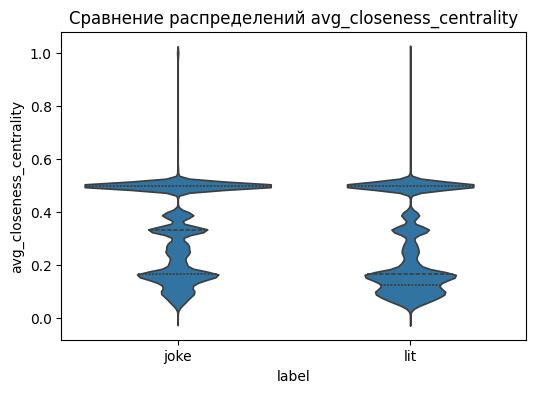

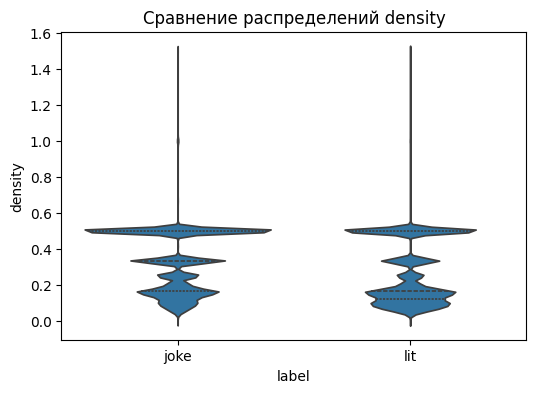

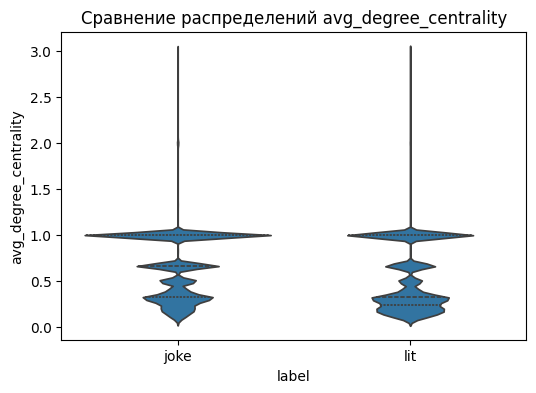

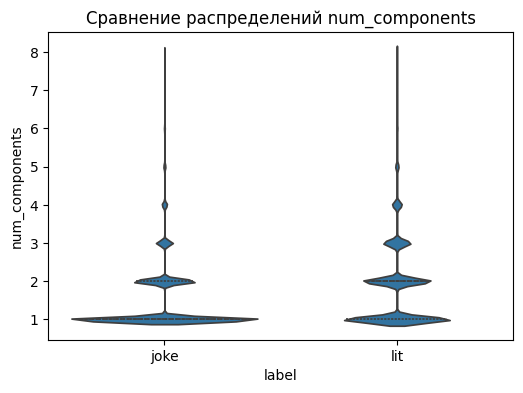

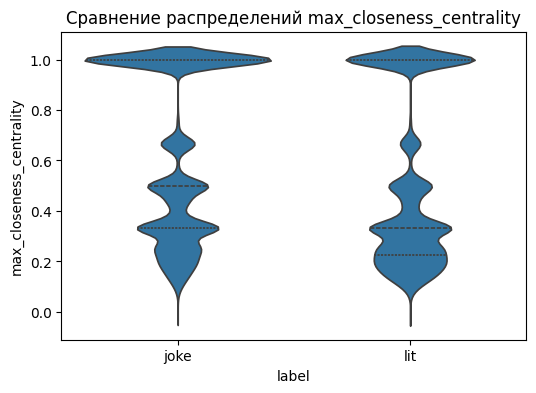

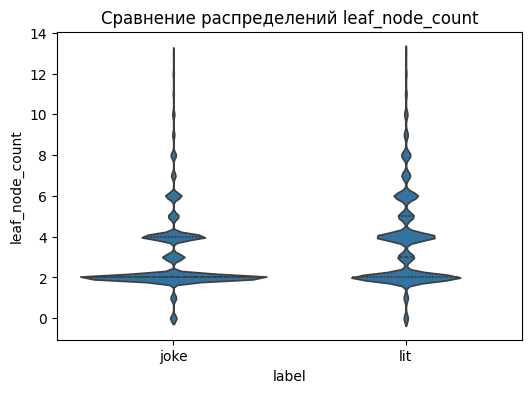

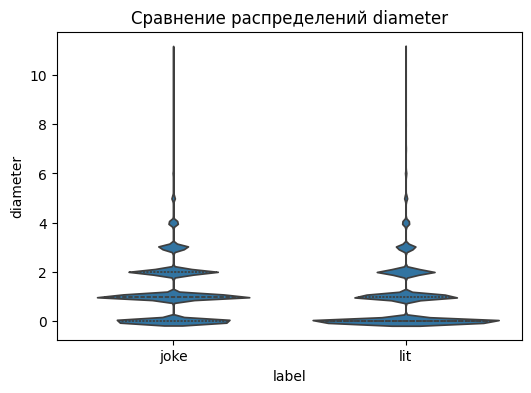

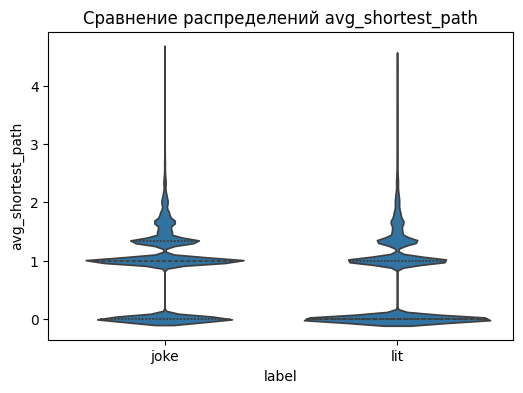

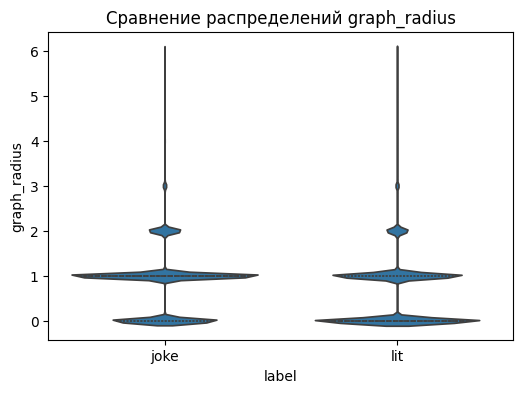

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Читаем очищенные данные
jokes = pd.read_csv('features/jokes_graph_features_f.csv')
lit   = pd.read_csv('features/lit_graph_features_f.csv')

# Отбираем ключевые признаки с small-эффектом
key_feats = [
    'avg_closeness_centrality','density','avg_degree_centrality',
    'num_components','max_closeness_centrality','leaf_node_count',
    'diameter','avg_shortest_path','graph_radius'
]

# Готовим общий DataFrame с меткой
jokes['label'] = 'joke'
lit['label']   = 'lit'
df = pd.concat([jokes, lit], ignore_index=True)

# Визуализация
for feat in key_feats:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='label', y=feat, data=df, inner='quartile')
    plt.title(f'Сравнение распределений {feat}')
    plt.show()


**Особенности по виолин-плотам**

`avg_closeness_centrality`
- У шуток медиана чуть выше (~0.33 vs ~0.17), а распределение более растянуто вверх (больше текстов с высокими значениями).
- У литературных отрезков плотность вокруг нижнего квартиля чуть выше, но хвост менее выражен.

`density`
- В шутках плотность графов распределена более равномерно между 0.2–0.5, с медианой около 0.33.
- В литературе медиана чуть ниже, распределение смещено в область более низких плотностей (0.1–0.4).

`avg_degree_centrality`
- Картина схожа с `avg_closeness_centrality`: шутки имеют больше текстов с высокими значениями централизации по степени.

`num_nodes`, `num_edges`, `leaf_node_count`, `num_components`
- В шутках количество листьев сконцентрировано в маленьких значениях (2–5 узлов); в литературе медиана и разброс чуть выше.
- Число компонент у шуток чаще равно 1 (единая связная субсеть), в литературе часто ≥2.

`max_closeness_centrality`
- В литературе встречается больше единичных значений (самый центральный узел близок ко всем), у шуток — чуть больший разброс вниз.

`diameter`, `avg_shortest_path`, `graph_radius`
- Общая картина схожа: у шуток основной пик на 1, в литературе распределение смещено на 2–3, но медианы почти совпадают.


In [37]:
import pandas as pd
from scipy.stats import mannwhitneyu, ks_2samp

# 1) Загрузка таблиц признаков триплетов
jokes_trip = pd.read_csv('features/jokes_triplet_features_full.csv')
lit_trip   = pd.read_csv('features/lit_triplet_features_full.csv')

# 2) Определяем общий список признаков (убираем идентификаторы, если они есть)
j_feats = set(jokes_trip.columns) - {'joke_id', 'id'}
l_feats = set(lit_trip.columns)   - {'lit_id', 'id'}
features = sorted(j_feats & l_feats)

# 3) Функции для тестов
def compute_mwu(jokes, lit, feats):
    rows = []
    for feat in feats:
        x = jokes[feat].dropna()
        y = lit[feat].dropna()
        stat, p = mannwhitneyu(x, y, alternative='two-sided')
        rows.append({'feature': feat,
                     'U_stat': stat,
                     'p_value': p})
    df = pd.DataFrame(rows)
    df['p_value_sci'] = df['p_value'].apply(lambda p: f"{p:.2e}")
    return df.sort_values('p_value')

def compute_ks(jokes, lit, feats):
    rows = []
    for feat in feats:
        x = jokes[feat].dropna()
        y = lit[feat].dropna()
        stat, p = ks_2samp(x, y, alternative='two-sided')
        rows.append({'feature': feat,
                     'KS_stat': stat,
                     'p_value': p})
    df = pd.DataFrame(rows)
    df['p_value_sci'] = df['p_value'].apply(lambda p: f"{p:.2e}")
    return df.sort_values('p_value')

# 4) Запускаем тесты
mwu_df = compute_mwu(jokes_trip, lit_trip, features)
ks_df  = compute_ks (jokes_trip, lit_trip, features)

# 5) Выводим результаты
print("=== Mann–Whitney U (триплетные признаки) ===")
print(mwu_df[['feature','U_stat','p_value_sci']].to_string(index=False))

print("\n=== Kolmogorov–Smirnov (триплетные признаки) ===")
print(ks_df [['feature','KS_stat','p_value_sci']].to_string(index=False))


=== Mann–Whitney U (триплетные признаки) ===
          feature   U_stat p_value_sci
     avg_pred_len 2.95e+10    0.00e+00
      obj_entropy 2.66e+10    0.00e+00
  pred_edge_ratio 3.54e+10    0.00e+00
     pred_entropy 2.65e+10    0.00e+00
     subj_entropy 2.66e+10    0.00e+00
    triplet_count 2.68e+10    0.00e+00
 unique_obj_count 2.72e+10    0.00e+00
unique_pred_count 2.68e+10    0.00e+00
unique_subj_count 2.73e+10    0.00e+00
   subj_obj_ratio 3.48e+10   3.92e-223
     avg_subj_len 3.27e+10    1.87e-22
      avg_obj_len 3.36e+10    3.48e-15

=== Kolmogorov–Smirnov (триплетные признаки) ===
          feature  KS_stat p_value_sci
     avg_pred_len 1.00e-01    0.00e+00
      obj_entropy 1.54e-01    0.00e+00
  pred_edge_ratio 9.27e-02    0.00e+00
     pred_entropy 1.68e-01    0.00e+00
     subj_entropy 1.62e-01    0.00e+00
   subj_obj_ratio 7.61e-02    0.00e+00
    triplet_count 1.52e-01    0.00e+00
 unique_obj_count 1.48e-01    0.00e+00
unique_pred_count 1.54e-01    0.00e+00
unique_s

In [38]:
import pandas as pd
import numpy as np

def cliffs_delta_fast(x, y):
    """
    Быстрый расчёт Cliff’s Delta:
    delta = (число пар x_i > y_j) − (число пар x_i < y_j) / (n * m)
    Возвращает (delta, size), где size ∈ {negligible, small, medium, large}.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    n, m = len(x), len(y)
    if n == 0 or m == 0:
        return np.nan, 'negligible'
    y_sorted = np.sort(y)
    pos_left  = np.searchsorted(y_sorted, x, side='left')
    pos_right = np.searchsorted(y_sorted, x, side='right')
    total_less    = pos_left.sum()
    total_greater = (m - pos_right).sum()
    delta = (total_greater - total_less) / (n * m)
    ad = abs(delta)
    if   ad < 0.147: size = 'negligible'
    elif ad < 0.33:  size = 'small'
    elif ad < 0.474: size = 'medium'
    else:            size = 'large'
    return delta, size

# -----------------------------------------------------------------------------
# Основной блок
# -----------------------------------------------------------------------------

# 1) Загрузка признаков триплетов
jokes_trip = pd.read_csv('features/jokes_triplet_features_full.csv')
lit_trip   = pd.read_csv('features/lit_triplet_features_full.csv')

# 2) Определяем список признаков (без колонок-идентификаторов)
j_feats = set(jokes_trip.columns) - {'joke_id', 'id'}
l_feats = set(lit_trip.columns)   - {'lit_id',   'id'}
features = sorted(j_feats & l_feats)

# 3) Считаем Cliff’s Delta
rows = []
for feat in features:
    x = jokes_trip[feat].dropna().values
    y = lit_trip[feat].dropna().values
    delta, size = cliffs_delta_fast(x, y)
    rows.append({
        'feature': feat,
        'cliffs_delta': delta,
        'effect_size': size,
        'joke_median': np.median(x),
        'lit_median':  np.median(y)
    })

# 4) Сбор результатов в DataFrame и сортировка
res = pd.DataFrame(rows)
res = res.reindex(res['cliffs_delta'].abs().sort_values(ascending=False).index)

# 5) Сохранение или вывод
print(res.to_string(index=False))
# Или сохранить в CSV:
# res.to_csv('triplet_cliffs_delta.csv', index=False)


          feature  cliffs_delta effect_size  joke_median  lit_median
     pred_entropy      2.03e-01       small     1.00e+00    1.00e+00
     subj_entropy      1.99e-01       small     9.18e-01    1.00e+00
      obj_entropy      1.98e-01       small     1.00e+00    1.58e+00
    triplet_count      1.94e-01       small     2.00e+00    3.00e+00
unique_pred_count      1.93e-01       small     1.00e+00    2.00e+00
 unique_obj_count      1.81e-01       small     2.00e+00    2.00e+00
unique_subj_count      1.76e-01       small     1.00e+00    2.00e+00
     avg_pred_len      1.12e-01  negligible     6.00e+00    6.75e+00
  pred_edge_ratio     -6.49e-02  negligible     7.50e-01    6.67e-01
   subj_obj_ratio     -4.77e-02  negligible     1.00e+00    8.67e-01
     avg_subj_len      1.57e-02  negligible     6.00e+00    6.00e+00
      avg_obj_len     -1.27e-02  negligible     6.00e+00    6.00e+00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

jokes = pd.read_csv('features/jokes_graph_features.csv')
lit   = pd.read_csv('features/lit_graph_features.csv')

jokes['label'] = 1  # joke = 1
lit['label']   = 0  # lit  = 0

df = pd.concat([jokes, lit], ignore_index=True)

# Фичи и целевая переменная
key_feats = [
    'avg_closeness_centrality','density','avg_degree_centrality',
    'num_components','max_closeness_centrality',
    'leaf_node_count','diameter','avg_shortest_path','graph_radius'
]
X = df[key_feats].fillna(0)
y = df['label']

# Разбиение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Масштабирование (для LR)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# Логистическая регрессия
lr = LogisticRegression(max_iter=1000).fit(X_train_s, y_train)
y_pred_lr = lr.predict(X_test_s)
y_prob_lr = lr.predict_proba(X_test_s)[:,1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# Важность признаков (для RF)
importances = pd.Series(rf.feature_importances_, index=key_feats).sort_values(ascending=False)
print("\nFeature importances (Random Forest):")
print(importances)


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.56      0.51      0.53     76106
           1       0.64      0.68      0.66     98041

    accuracy                           0.61    174147
   macro avg       0.60      0.60      0.60    174147
weighted avg       0.61      0.61      0.61    174147

ROC AUC: 0.6134105450613939

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.63      0.32      0.43     76106
           1       0.62      0.85      0.72     98041

    accuracy                           0.62    174147
   macro avg       0.62      0.59      0.57    174147
weighted avg       0.62      0.62      0.59    174147

ROC AUC: 0.6262358764907022

Feature importances (Random Forest):
avg_closeness_centrality    0.271426
avg_shortest_path           0.124538
max_closeness_centrality    0.117730
num_components              0.110102
leaf_node_count             0.086307
avg_degree_centr


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.63      0.32      0.43     76106
           1       0.62      0.85      0.72     98041

    accuracy                           0.62    174147
   macro avg       0.62      0.59      0.57    174147
weighted avg       0.62      0.62      0.59    174147

ROC AUC: 0.6262358764907022


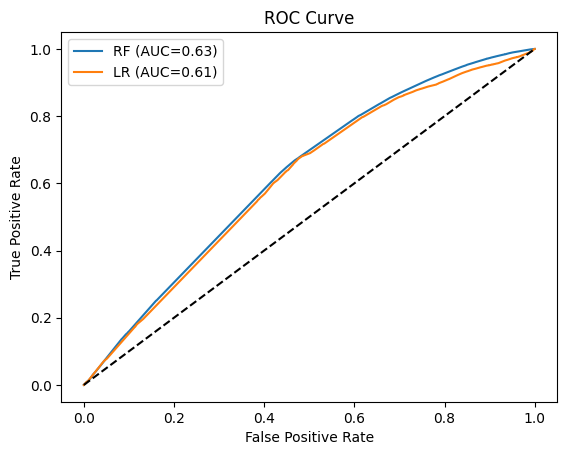

In [34]:
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# ROC–кривая
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'RF (AUC={roc_auc_score(y_test,y_prob_rf):.2f})')
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={roc_auc_score(y_test,y_prob_lr):.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()